### 결정트리 알고리즘
- 데이터셋 피쳐(특성)을 기준으로 데이터 분류 알고리즘
- 질문방식 Yes/No 결과에 따라 데이터셋 분리
- 장점: 스케일링/정규화 불필요				=> 성능 향상에 영향 X, 단순/직관 알고리즘
- 단점: 과대적합 가능성 높음				=> 해결 위해 하이퍼 파라미터 설정 많이 해야!
- 다른 ML 알고리즘 대비 낮은 성능			=> But) 여러개 DT가 모일 시, 높은 성능
	- 앙상블에 주로 사용!!

#### 모듈 로딩 & 데이터 준비

In [66]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

In [67]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True, return_X_y=True)

print(f'featureDF:	=> {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR:	=> {targetSR.shape}, {targetSR.ndim}D')

featureDF:	=> (150, 4), 2D
targetSR:	=> (150,), 1D


#### 학습용/테스트용 데이터셋 분리

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify = targetSR,
                                                    random_state = 10			# 10 => feature_importance... 8ㅅ8
                                                    )

print(f'X_train	=>:	{X_train.shape}, {X_train.ndim}D	y_train	=>:	{y_train.shape}, {y_train.ndim}D')
print(f'X_test	=>:	{X_test.shape}, {X_test.ndim}D	y_test	=>:	{y_test.shape}, {y_test.ndim}D')

X_train	=>:	(112, 4), 2D	y_train	=>:	(112,), 1D
X_test	=>:	(38, 4), 2D	y_test	=>:	(38,), 1D


#### 학습_기본학습
- 튜닝 없이

In [69]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [70]:
# 모델 파라미터: 학습 fit()후 train DS 기반 설정된 값
print(f'[dt_model.classes_]		=>	{dt_model.classes_}')
print(f'[dt_model.n_classes_]		=>	{dt_model.n_classes_}')
print(f'[dt_model.max_features_]		=>	{dt_model.max_features_}개')
print(f'[dt_model.feature_importances_]		=>	{dt_model.feature_importances_}')
print(f'[dt_model.feature_names_in_]		=>	{dt_model.feature_names_in_}')


[dt_model.classes_]		=>	[0 1 2]
[dt_model.n_classes_]		=>	3
[dt_model.max_features_]		=>	4개
[dt_model.feature_importances_]		=>	[0.03125249 0.         0.06844775 0.90029976]
[dt_model.feature_names_in_]		=>	['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


#### 성능 체크

In [71]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

print(f'train_score	=> {train_score}')
print(f'test_score	=> {test_score}')


train_score	=> 1.0
test_score	=> 1.0


#### 결과:	과대적합!!
- 데이터셋을 추가해야
- 더이상 추가할 데이터가 없음
- Cross Validation으로 한정된 데이터셋에 대해 반복 학습으로 과대적합 해결

#### 교차검증
- 데이터셋 부족 해결
- 과대적합 회피

In [72]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# 교차 검증 준비
# ==> 모델 인스턴스, 학습용 DS, cv (데이터셋 분할 개수; default=5) [기본]

dt_model_cross = DecisionTreeClassifier(random_state=11
                                        )

# dict 형태 Bunch data 반환
results = cross_validate( dt_model_cross, X_train, y_train, 
               return_train_score=True,
               return_estimator=True
               )

resultsDF = pd.DataFrame(results)
resultsDF.head(5)


,fit_time,score_time,estimator,test_score,train_score
0,0.003402,0.002283,DecisionTreeClassifier(random_state=11),0.956522,1.0
1,0.002000,0.002000,DecisionTreeClassifier(random_state=11),0.956522,1.0
2,0.002001,0.000998,DecisionTreeClassifier(random_state=11),0.954545,1.0
3,0.002000,0.001003,DecisionTreeClassifier(random_state=11),0.863636,1.0
4,0.002312,0.001022,DecisionTreeClassifier(random_state=11),0.909091,1.0


#### 하이퍼-파라미터 튜닝
- 성능향상 위한
- 목적: DT => 과대적합 해소
- 하이퍼-파라미터
	* max_depth, min_samples_leaf, ... 		=> Too Many ^_^.....

In [73]:
from sklearn.model_selection import GridSearchCV

# 하이퍼-파라미터 dict 생성
params = {'max_depth':[4,3,2,1],
          'min_samples_leaf':[5,3,2] }

grid_CV = GridSearchCV( DecisionTreeClassifier(), param_grid=params, refit=True, 
                       return_train_score=True)

grid_CV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [74]:
# 모델 파라미터
print(f'[grid_CV.grid_CV.best_params_]		{grid_CV.best_params_}')
print(f'[grid_CV.grid_CV.best_score_]		{grid_CV.best_score_}')
print(f'[grid_CV.grid_CV.best_estimator_]		{grid_CV.best_estimator_}')
print(f'[grid_CV.grid_CV.cv_results_]\n		{grid_CV.cv_results_}')

[grid_CV.grid_CV.best_params_]		{'max_depth': 4, 'min_samples_leaf': 2}
[grid_CV.grid_CV.best_score_]		0.9371541501976285
[grid_CV.grid_CV.best_estimator_]		DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
[grid_CV.grid_CV.cv_results_]
		{'mean_fit_time': array([0.00198145, 0.00439825, 0.00162454, 0.0014133 , 0.00162268,
       0.0014163 , 0.00100317, 0.00120044, 0.00120015, 0.00120978,
       0.00139785, 0.00099807]), 'std_fit_time': array([6.05435774e-04, 3.49549669e-03, 4.69595843e-04, 4.96252598e-04,
       5.07894185e-04, 4.90346644e-04, 3.89900038e-06, 3.99709754e-04,
       3.97477949e-04, 3.98418987e-04, 4.87458875e-04, 3.95918441e-06]), 'mean_score_time': array([0.00301404, 0.00199819, 0.00102034, 0.00100808, 0.00128655,
       0.00126457, 0.00139751, 0.00099978, 0.00099835, 0.00119181,
       0.00080009, 0.00140028]), 'std_score_time': array([1.99423752e-03, 1.26215218e-03, 3.38297733e-05, 2.06421478e-06,
       3.69411455e-04, 3.86054561e-04, 4.85837505e-04, 4.4220058

In [75]:
grid_cv_result = pd.DataFrame(grid_CV.cv_results_)
grid_cv_result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001981,0.000605,0.003014,0.001994,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.944444,0.955556,0.966667,0.953109,0.008425
1,0.004398,0.003495,0.001998,0.001262,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.928458,0.022163,2,0.955056,0.977528,0.966667,0.966667,0.977778,0.968739,0.008423
2,0.001625,0.000470,0.001020,0.000034,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.956522,0.956522,0.954545,...,0.937154,0.022925,1,0.977528,0.977528,0.977778,0.977778,0.977778,0.977678,0.000122
3,0.001413,0.000496,0.001008,0.000002,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.966667,0.955556,0.966667,0.957553,0.008543
4,0.001623,0.000508,0.001287,0.000369,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.919368,0.034262,8,0.955056,0.955056,0.966667,0.955556,0.977778,0.962022,0.009041


In [76]:
grid_cv_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [77]:
grid_cv_result.shape

(12, 22)

mean_train_score, mean_test_score 칼럼 추출해서 모델 성능 비교

####  주요 피쳐 시각화

In [78]:
best_model = grid_CV.best_estimator_
print(f'[best_model.max_depth] {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] {best_model.min_samples_leaf}')

[best_model.max_depth] 4
[best_model.min_samples_leaf] 2


In [79]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_

(array([0.01321873, 0.        , 0.59964451, 0.38713677]), 4)

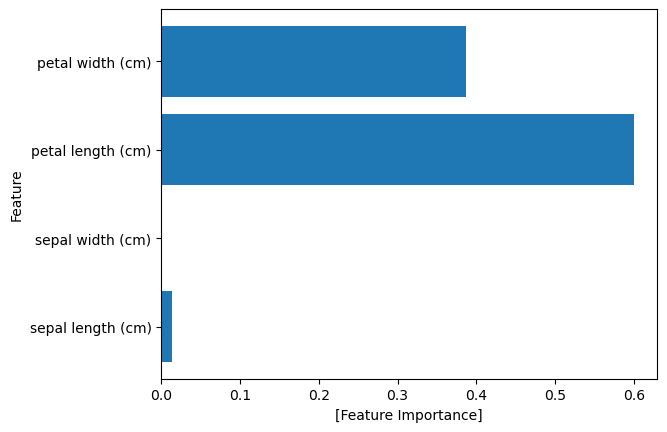

In [80]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel("[Feature Importance]")
plt.ylabel("Feature")
plt.show()

#### DT 그래프 시각화 w/ Graphviz
- Graphviz 프로그램 다운 & 설치		=> C++/C# (이미지 처리 특화)
- python용 패키지 (wraper) 설치
- .dot 파일로 저장된 DT 결과를 graphviz로 읽어 시각화

In [81]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
iris.target_names

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [84]:
from sklearn.tree import export_graphviz

# DT 모델 결과를 .dot 파일로 저장 => export_graphviz
export_graphviz(best_model, out_file='tree.dot', class_names=['setosa', 'versicolor', 'virginica'],
                feature_names=best_model.feature_names_in_,
                impurity=True,
                filled=True,
                rotate=True						# 가로방향으로 회전
                )

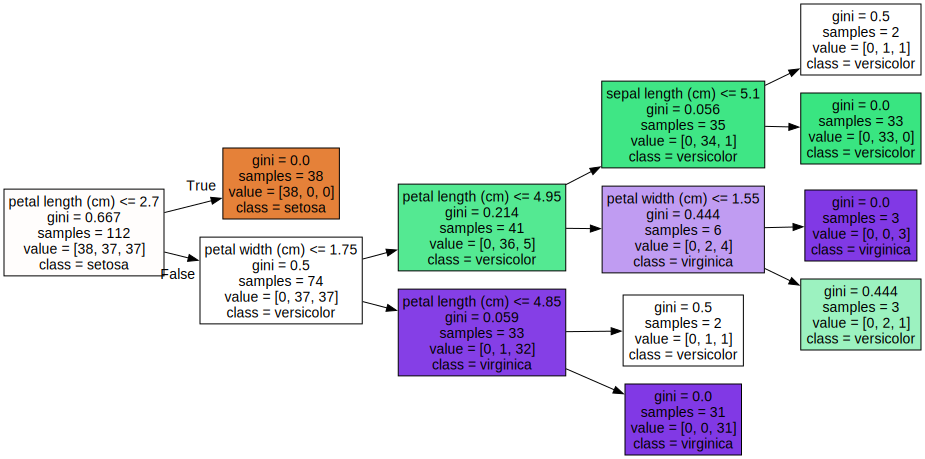

In [85]:
# .dot 파일 출력
import graphviz

with open('tree.dot') as f:
    
	# 파일 내용 읽기
    dot_data = f.read()
    
graphviz.Source(dot_data)
    


#### p.198 check!!